## Exploring and Preparing Data

### Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import requests

In [80]:
path = "/Users/QXJ/Desktop/IBM/SpaceX/dataset_part_2.csv"
df = pd.read_csv(path, index_col = False)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

<function matplotlib.pyplot.show(close=None, block=None)>

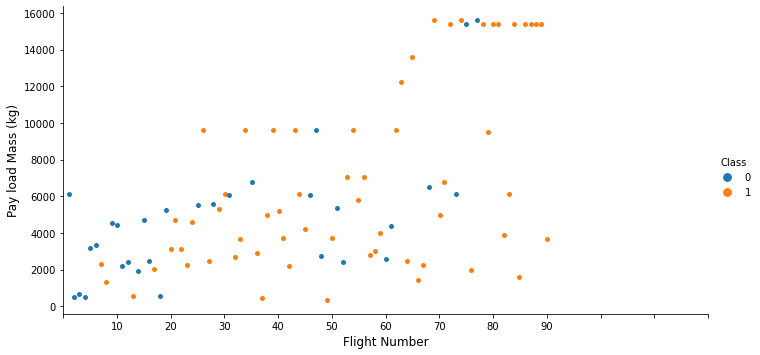

In [233]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect =2)
plt.xlabel("Flight Number",fontsize=12)
plt.ylabel("Pay load Mass (kg)",fontsize=12)
plt.xticks(np.arange(-1,120,10))
plt.show

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

#### 1. Visualize the relationship between Flight Number and Launch Site

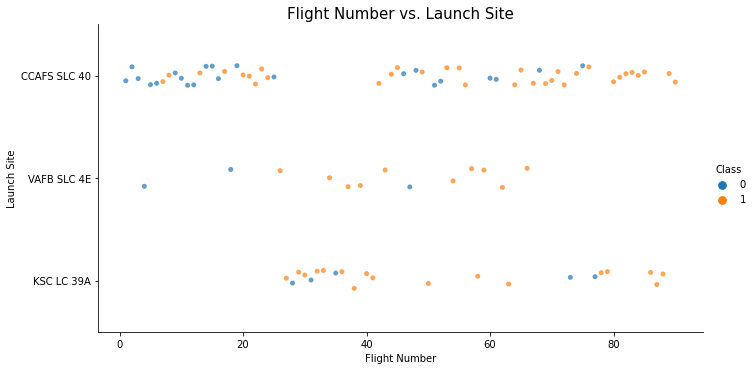

In [168]:
# Options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, kind = 'strip', aspect=2, alpha = 0.7)
plt.title('Flight Number vs. Launch Site', fontsize = 15)
plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Launch Site",fontsize=10)
plt.show()

*-> KSC LC 39A has the highest sucessful rate, vice verce CCAFS SLC 40 has the lowest*

#### 2. Visualize the relationship between Payload and Launch Site

<function matplotlib.pyplot.show(close=None, block=None)>

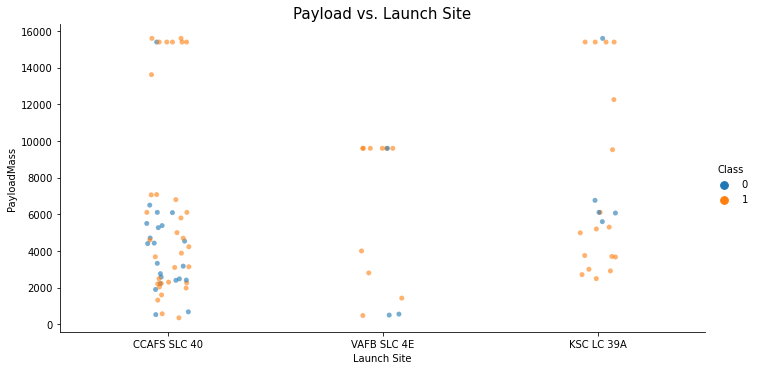

In [169]:
sns.catplot(x='LaunchSite',y='PayloadMass', hue = 'Class', data=df,aspect =2, alpha = 0.6)
plt.title('Payload vs. Launch Site', fontsize = 15)
plt.xlabel('Launch Site')
plt.ylabel('PayloadMass')
plt.show

*-> VAFB SLC 4E has no payload obove 10000 kg*

#### 4. Visualize the relationship between success rate of each orbit type

In [97]:
df2 = df.groupby(['Orbit'])['Class'].mean().reset_index()
df2.head(30)

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

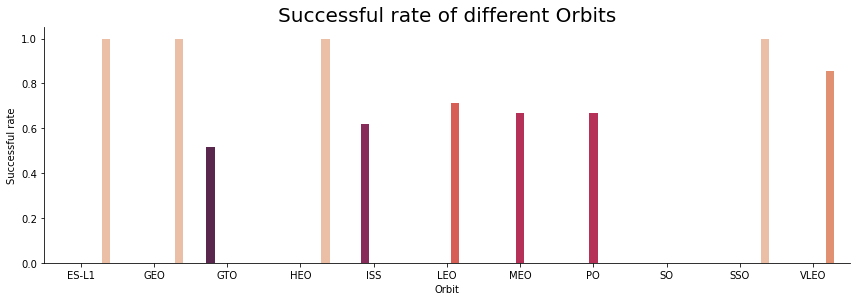

In [136]:
sns.catplot(x = 'Orbit', y='Class', data=df2, kind='bar',palette = 'rocket', hue = 'Class', height =4, aspect =3, legend = None )
plt.title('Successful rate of different Orbits',fontsize = 20 )
plt.ylabel('Successful rate')
plt.show

#### 4. Visualize the relationship between FlightNumber and Orbit type

<function matplotlib.pyplot.show(close=None, block=None)>

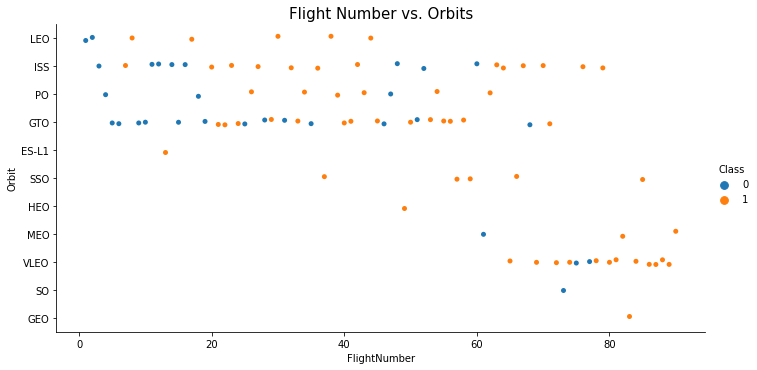

In [165]:
sns.catplot(y='Orbit', x='FlightNumber', data=df,hue='Class',aspect =2)
plt.title('Flight Number vs. Orbits', fontsize = 15)
plt.show

*->In the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.*

#### 5. Visualize the relationship between Payload and Orbit type

<function matplotlib.pyplot.show(close=None, block=None)>

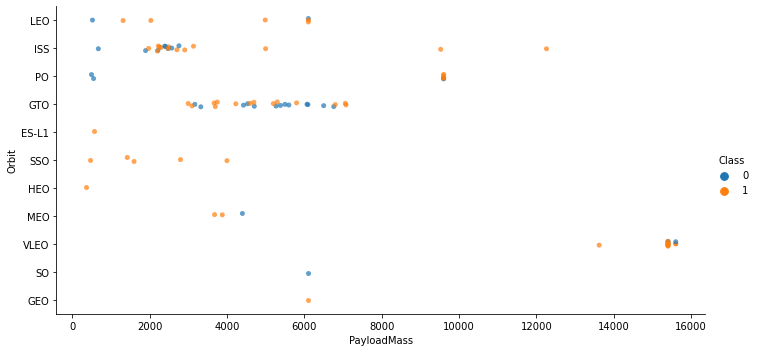

In [176]:
sns.catplot(x='PayloadMass',y='Orbit',data=df, hue='Class',aspect=2,alpha=0.7)
plt.show

*->With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.*

#### 6. Visualize the launch success yearly trend

In [180]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [191]:
df3=df.groupby(['Date'])['Class'].mean().reset_index()
df3.head()

,Date,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


<function matplotlib.pyplot.show(close=None, block=None)>

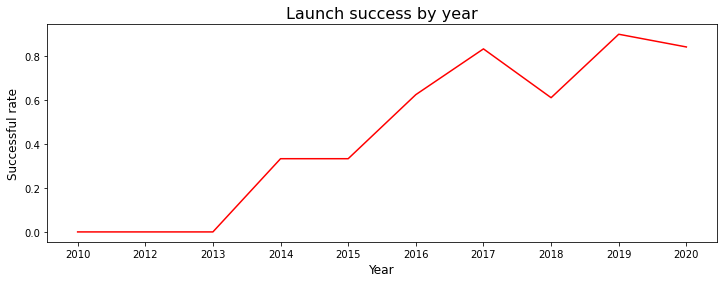

In [206]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Date',y='Class',data=df3, color ='red')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Successful rate', fontsize=12)
plt.title('Launch success by year',fontsize=16)
plt.show

*->The sucess rate since 2013 kept increasing till 2020*

#### 7. Create dummy variables to categorical columns

In [210]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [221]:
features_one_hot = pd.get_dummies(features,columns = ['Orbit','LaunchSite','Serial','LandingPad'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
df_f.dtypes

FlightNumber                             int64
PayloadMass                            float64
Flights                                  int64
Block                                  float64
ReusedCount                              int64
                                        ...   
LandingPad_5e9e3032383ecb267a34e7c7      uint8
LandingPad_5e9e3032383ecb554034e7c9      uint8
LandingPad_5e9e3032383ecb6bb234e7ca      uint8
LandingPad_5e9e3032383ecb761634e7cb      uint8
LandingPad_5e9e3033383ecbb9e534e7cc      uint8
Length: 83, dtype: object

#### 8. Cast all numeric columns to `float64`

In [227]:
features_one_hot.astype('float').dtypes

FlightNumber                           float64
PayloadMass                            float64
Flights                                float64
GridFins                               float64
Reused                                 float64
                                        ...   
LandingPad_5e9e3032383ecb267a34e7c7    float64
LandingPad_5e9e3032383ecb554034e7c9    float64
LandingPad_5e9e3032383ecb6bb234e7ca    float64
LandingPad_5e9e3032383ecb761634e7cb    float64
LandingPad_5e9e3033383ecbb9e534e7cc    float64
Length: 80, dtype: object

In [234]:
features_one_hot.to_csv('/Users/QXJ/Desktop/IBM/SpaceX/dataset_part_3.csv', index=False)